# Example 2.10

A liquid limit test was conducted on a soil and resulted in the data shown below. Find the liquid limit. 

## Data:

Table given

## Principles

$w=\cfrac{W_w}{W_s}\times 100$

$LL=$ water content for 25 blows

In [30]:
import numpy as np
import pandas as pd
import Soilved as slv
import matplotlib.pyplot as plt

In [31]:
LL_data=pd.read_csv("./data/mod2example10.csv") #open data to variable
LL_data # shows data

,Test No,\tWet soil + container,\tDry soil + container,\tContainer,\tN
0,1,17.71,15.27,5.23,32
1,2,20.08,16.78,5.21,30
2,3,24.31,19.25,5.10,28
3,4,16.45,13.20,5.11,26
4,5,18.35,14.23,5.13,23
5,6,26.80,19.45,5.11,21


In [32]:
w=slv.GetWaterContent(LL_data['\tWet soil + container'], LL_data['\tDry soil + container'], LL_data['\tContainer']) #Calculates water contents
print(w)

0    24.302789
1    28.522040
2    35.759717
3    40.173053
4    45.274725
5    51.255230
dtype: float64


Text(0, 0.5, 'Water content $w$ [$\\%$]')

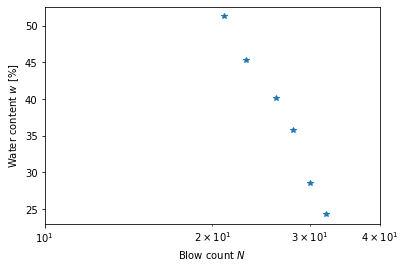

In [33]:
plt.plot(LL_data['\tN'], w, '*') #plots results
plt.xscale('log')
plt.xlim(10,40)
plt.xlabel(r'Blow count $N$')
plt.ylabel(r'Water content $w$ [$\%$]')

In [34]:
# We need to fit a log model
fit= np.polyfit(np.log10(LL_data['\tN']),w, 1)#Fits the model
print(fit)#prints coefficients of regression
LL=fit[0]*np.log10(25)+fit[1] #use regression to find LL
print("LL= %1.1f percent" %LL)

[-144.32436835  242.68937403]
LL= 40.9 percent


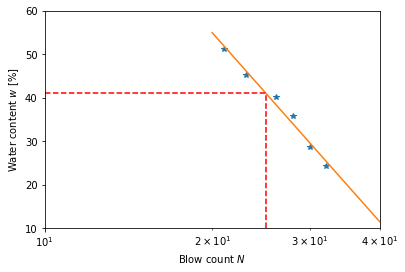

In [35]:
plt.plot(LL_data['\tN'], w, '*') #plots results
plt.xscale('log')
plt.xlim(10,40)
plt.ylim(10,60)
plt.xlabel(r'Blow count $N$')
plt.ylabel(r'Water content $w$ [$\%$]')

x=np.linspace(20,40, 50) #generates 50 values for 20 to 30
y=fit[0]*np.log10(x)+fit[1] #uses regression

plt.plot(x,y)

plt.plot([25,25], [10,LL], '--',color='r') #vert red line
plt.plot([10,25], [LL,LL], '--',color='r') #hor red line